In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Settings to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns',999)


In [83]:
df = pd.read_csv('data_to_be_cleaned.csv')

df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold


Let's try to get an overview of how many missing values are there in the data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        40 non-null     int64  
 1   Client               38 non-null     object 
 2   Beneficiary          40 non-null     object 
 3   AmountUSD            38 non-null     float64
 4   TransactionDateTime  40 non-null     object 
 5   ClientTier           37 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ KB


As we can see, There are 2 missing values from Client, Amount USD, and 3 from ClientTier Columns. We also see that the datetime column is not in a datetime Dtype. Let's dive deeper into those

In [85]:
df[df['Client'].isna()]

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
14,15,NaN,Luke Skywalker,150.00,2024-06-01 12:43,Silver
26,27,NaN,Tyrion Lannister,200.00,2024-06-01 12:54,Platinum


In [86]:
df = df[df['Client'].isna() == False]

In [87]:
df.get('ClientTier').tolist()

[' Gold',
 ' Silver',
 ' Gold',
 ' Gold',
 ' Platinum',
 ' Gold',
 ' Silver',
 ' Bronze',
 ' Silver',
 ' Gold',
 ' Gold',
 ' Gold',
 ' Bronze',
 ' Platinum',
 nan,
 ' Platinum',
 ' Silver',
 ' Gold',
 nan,
 ' Gold',
 ' Gold',
 ' Platinum',
 ' Silver',
 ' Bronze',
 ' Gold',
 ' Gold',
 ' Silver',
 ' Gold',
 ' Platinum',
 ' Silver',
 ' Gold',
 ' Bronze',
 ' Gold',
 ' Silver',
 ' Bronze',
 ' Platinum',
 nan,
 ' Silver']

One might notice that in the column values of the Client Tier, there is a trailing whitespace before the column entries.

In [88]:
df['ClientTier'] = df['ClientTier'].replace(r"^ +| +$", r"", regex=True)

C:\Users\avash\AppData\Local\Temp\ipykernel_12132\2001170400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ClientTier'] = df['ClientTier'].replace(r"^ +| +$", r"", regex=True)


In [89]:
df.get('ClientTier').tolist()

['Gold',
 'Silver',
 'Gold',
 'Gold',
 'Platinum',
 'Gold',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Gold',
 'Gold',
 'Bronze',
 'Platinum',
 nan,
 'Platinum',
 'Silver',
 'Gold',
 nan,
 'Gold',
 'Gold',
 'Platinum',
 'Silver',
 'Bronze',
 'Gold',
 'Gold',
 'Silver',
 'Gold',
 'Platinum',
 'Silver',
 'Gold',
 'Bronze',
 'Gold',
 'Silver',
 'Bronze',
 'Platinum',
 nan,
 'Silver']

Now we can look at all the values that have ClientTier of Silver and Platinum to see if we can find patterns

In [90]:
df[df['ClientTier'] == 'Silver']


,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
17,18,Frodo Baggins,Bilbo Baggins,60.00,2024-06-01 12:46,Silver
23,24,Samwise Gamgee,Frodo Baggins,NaN,2024-06-01 12:51,Silver
28,29,James T. Kirk,Spock,90.00,2024-06-01 12:56,Silver
31,32,Michael Corleone,Sonny Corleone,125.00,2024-06-01 12:59,Silver
35,36,Mario,Luigi,85.00,2024-06-01 13:03,Silver
39,40,Clark Kent,Lois Lane,210.00,2024-06-01 13:10,Silver


In [91]:
df[df['ClientTier'] == 'Platinum']

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
13,14,Jon Snow,Arya Stark,150.75,2024-06-01 12:42,Platinum
16,17,Bruce Wayne,Clark Kent,80.00,2024-06-01 12:45,Platinum
22,23,Neo,Morpheus,115.00,2024-06-01 12:50,Platinum
30,31,Tony Stark,Steve Rogers,310.00,2024-06-01 12:58,Platinum
37,38,Bruce Wayne,Joker,255.00,2024-06-01 13:06,Platinum


We cannot infer from the Client or Transaction ID columns what Client values we could impute this data with. So we look at other elements

In [92]:
df[df['AmountUSD'].isna()]

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
23,24,Samwise Gamgee,Frodo Baggins,NaN,2024-06-01 12:51,Silver


In [93]:
df[df['ClientTier'].isna()]

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
15,16,Hermione Granger,Harry Potter,250.00,2024-06-01 12:44,NaN
19,20,Michael Scott,Jim Halpert,85.00,2024-06-01 12:48,NaN
38,39,Optimus Prime,Megatron,100.00,2024-06-01 13:09,NaN


In [94]:
df['Client'] = df['Client'].replace(r"^ +| +$", r"",regex=True)

C:\Users\avash\AppData\Local\Temp\ipykernel_12132\410488667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Client'] = df['Client'].replace(r"^ +| +$", r"",regex=True)


In [95]:
df[(df['Client'] == 'Hermione Granger') | (df['Client'] == 'Michael Scott') | (df['Client'] == 'Optimus Prime')]

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
15,16,Hermione Granger,Harry Potter,250.00,2024-06-01 12:44,NaN
19,20,Michael Scott,Jim Halpert,85.00,2024-06-01 12:48,NaN
38,39,Optimus Prime,Megatron,100.00,2024-06-01 13:09,NaN


Again we fail to find another entry from the table to impute the ClientTier values.

Next thing we can look at is the formatting and typing of the names in the Client column.

In [96]:
df.get('Client').tolist()

['Darth Vader',
 '<Frodo Baggins>',
 'Tony Stark',
 'Tony Stark',
 'Jon Snow.',
 'Harry*Potter',
 'Luke Skywalker',
 'Katniss Everdeen',
 'Michael Scott.',
 'Walter White',
 'Tony Stark',
 'DARTH VADER',
 'Frodo Baggins',
 'Jon Snow',
 'Hermione Granger',
 'Bruce Wayne',
 'Frodo Baggins',
 '-Walter White-',
 'Michael Scott',
 'Sherlock Holmes',
 'Sherlock Holmes',
 'Neo',
 'Samwise Gamgee',
 'Ellen Ripley',
 'Rick Sanchez',
 'Indiana Jones',
 'James T. Kirk',
 'James Bond',
 'Tony Stark',
 'Michael Corleone',
 'Jack Sparrow',
 'Fox Mulder',
 'Harry Potter',
 'Mario',
 'Walter White',
 'Bruce Wayne',
 'Optimus Prime',
 'Clark Kent']

In [97]:
df[df['Client'].astype(str).str.match("^[a-zA-Z\s]+$") == False]



,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
1,2,<Frodo Baggins>,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
4,5,Jon Snow.,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,Harry*Potter,Hermione Granger,200.00,2024-06-01 12:34,Gold
8,9,Michael Scott.,Dwight Schrute,85.00,2024-06-01 12:37,Silver
18,19,-Walter White-,GUS FRING,95.00,2024-06-01 12:47,Gold
28,29,James T. Kirk,Spock,90.00,2024-06-01 12:56,Silver


In [98]:

df['Client'] = df['Client'].astype(str).str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip()


C:\Users\avash\AppData\Local\Temp\ipykernel_12132\4202888113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Client'] = df['Client'].astype(str).str.replace(r"[^a-zA-Z\s]", "", regex=True).str.strip()


In [99]:
df

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,Frodo Baggins,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,HarryPotter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold


Next thing we can look at is the duplicates and if the dataframe has certain duplicates or not. Since the Transaction ID is unique for each of the rows, we can run the duplicate search on the rest of the columns.

In [100]:
df[df.duplicated(subset=["Client","Beneficiary","AmountUSD","TransactionDateTime","ClientTier"])]

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
3,4,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
21,22,Sherlock Holmes,John Watson,220.00,2024-06-01 12:49,Gold


In [101]:
# Drop duplicates based on specific columns
df = df.drop_duplicates(subset=["Client", "Beneficiary", "AmountUSD", "TransactionDateTime", "ClientTier"], keep="first")


In [102]:
df.head(10)

,TransactionID,Client,Beneficiary,AmountUSD,TransactionDateTime,ClientTier
0,1,Darth Vader,Luke Skywalker,120.50,2024-06-01 12:30,Gold
1,2,Frodo Baggins,Gandalf the Grey,NaN,2024-06-01 12:31,Silver
2,3,Tony Stark,Bruce Banner,300.40,2024-06-01 12:32,Gold
4,5,Jon Snow,Daenerys Targaryen,150.75,2024-06-01 12:33,Platinum
5,6,HarryPotter,Hermione Granger,200.00,2024-06-01 12:34,Gold
6,7,Luke Skywalker,Han Solo,90.00,2024-06-01 12:35,Silver
7,8,Katniss Everdeen,Peeta Mellark,120.00,2024-06-01 12:36,Bronze
8,9,Michael Scott,Dwight Schrute,85.00,2024-06-01 12:37,Silver
9,10,Walter White,Jesse Pinkman,70.00,2024-06-01 12:38,Gold
10,11,Tony Stark,Peter Parker,320.50,2024-06-01 12:39,Gold


Next thing we can evaluate is whether Clients have the same tier if they made another purchase as a step towards Data Validation. Also to note, the Client Tier system might go down or up based on recent transactions but we have no information on how it works in this case so we assume it has no errors.

We now move on to imputing the missing Numerical Data points

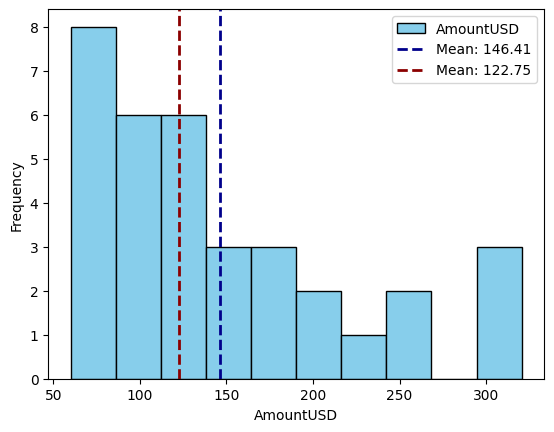

In [103]:
mean_value = df["AmountUSD"].mean()
median_value = df["AmountUSD"].median()

ax = df['AmountUSD'].plot(kind='hist', bins = 10, color='skyblue', edgecolor = 'black')
ax.set_ylabel('Frequency')
ax.set_xlabel('AmountUSD')

ax.axvline(mean_value, color='darkblue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='darkred', linestyle='dashed', linewidth=2, label=f'Mean: {median_value:.2f}')

ax.legend()

plt.show()

In [104]:
np.mean(np.abs(df["AmountUSD"]-mean_value))

np.float64(59.06384083044982)

In [105]:
np.mean(np.abs(df["AmountUSD"]-median_value))

np.float64(55.79117647058824)

In [106]:
df.fillna({'AmountUSD':median_value}, inplace=True)

C:\Users\avash\AppData\Local\Temp\ipykernel_12132\3371046327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'AmountUSD':median_value}, inplace=True)
